In [1]:
# import libraries
import pandas as pd

In [2]:
# create dataframe
df = pd.read_csv("dataset.csv")
df = df.drop(["AVERAGE"], axis=1)
df

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.60,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.20,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.70,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.10,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.70,15.2,4.0,5.0,5,Without renovation
...,...,...,...,...,...,...,...,...,...,...,...,...
22671,4768792.0,New building,Котельники,8.0,Moscow region,0.0,31.75,13.0,5.0,4.0,17,Cosmetic
22672,5900000.0,New building,Домодедовская,25.0,Moscow region,1.0,31.60,10.1,12.2,11.0,15,Cosmetic
22673,3700000.0,New building,Котельники,30.0,Moscow region,0.0,18.00,15.0,8.1,17.0,17,Cosmetic
22674,5768869.0,New building,Жулебино,14.0,Moscow region,2.0,36.39,22.0,6.6,12.0,14,Cosmetic


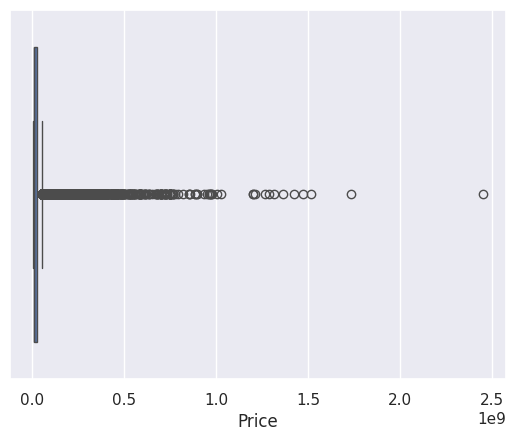

In [3]:
import seaborn as sns

sns.set_theme()

sns.boxplot(data=df, x="Price")
df = df[df["Price"] < 1e9]

In [4]:
def remove_outliers(df, column, quant=0.03):
    return df[
        (df[column] > df[column].quantile(quant))
        & (df[column] < df[column].quantile(1 - quant))
    ]

<Axes: xlabel='Price', ylabel='Count'>

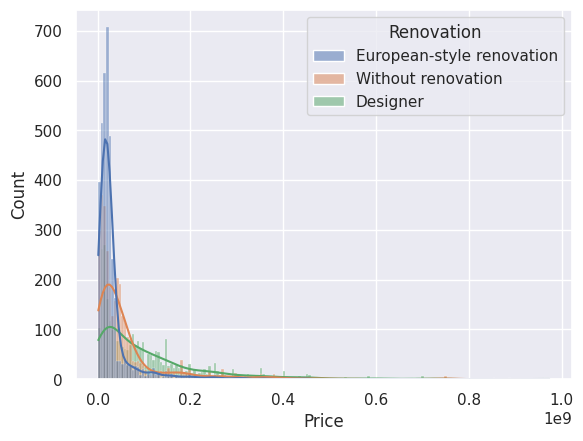

In [5]:
sns.histplot(
    data=remove_outliers(df[df["Renovation"] != "Cosmetic"], "Price", quant=0),
    x="Price",
    hue="Renovation",
    kde=True,
)

<Axes: xlabel='Price', ylabel='Count'>

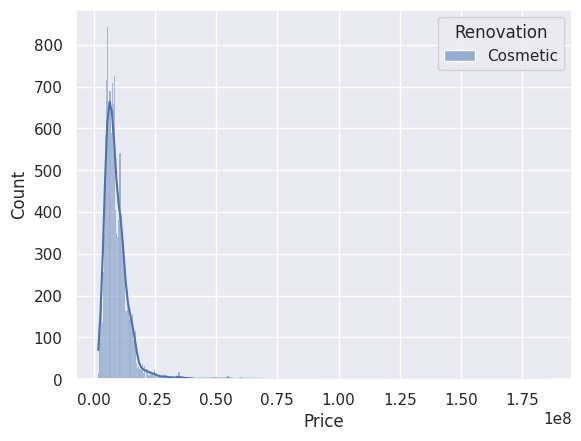

In [6]:
# plot pricing having removed outliers
sns.histplot(
    data=remove_outliers(df[df["Renovation"] == "Cosmetic"], "Price", quant=0),
    x="Price",
    hue="Renovation",
    kde=True,
)

<Axes: xlabel='Price'>

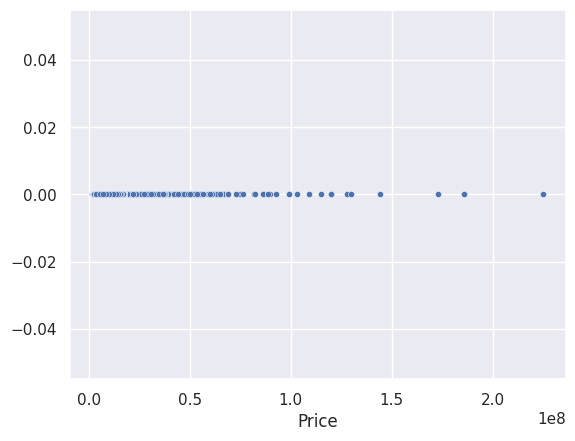

In [7]:
# check if "Renovation"=="Cosmetic" has outliers
sns.scatterplot(data=df[df["Renovation"] == "Cosmetic"], x="Price", y=0, s=20)

In [35]:
with open("stations.txt", "w") as f:
    for name in df["Metro station"].unique():
        f.write(name + "\n")

In [31]:
df.groupby("Metro station").count().sort_values("Price").index

Index(['Вешняки', 'Хлебниково', 'Санино', 'Улица Академика Королёва',
       'Долгопрудная', 'Воробьевы горы', 'Сколково', 'Лубянка', 'Партизанская',
       'Терехово (Мнёвники)',
       ...
       'Домодедовская', 'Каширская', 'Опалиха', 'Битца', 'Зябликово',
       'Жулебино', 'Котельники', 'Братиславская', 'Депо', 'Красногвардейская'],
      dtype='object', name='Metro station', length=317)

<Axes: xlabel='Area', ylabel='Price'>

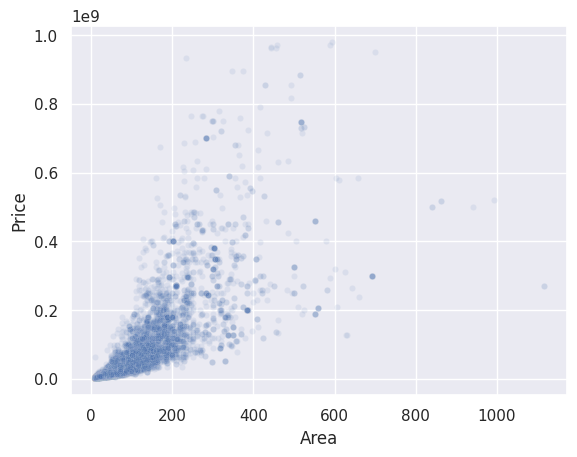

In [9]:
sns.scatterplot(
    data=df[df["Apartment type"] == "Secondary"], x="Area", y="Price", alpha=0.1, s=20
)

<Axes: xlabel='Area', ylabel='Price'>

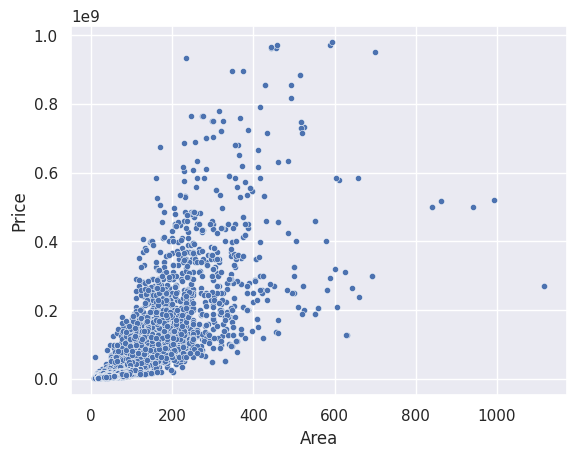

In [10]:
sns.scatterplot(data=df, x="Area", y="Price", s=20)

<Axes: xlabel='Number of rooms', ylabel='Price'>

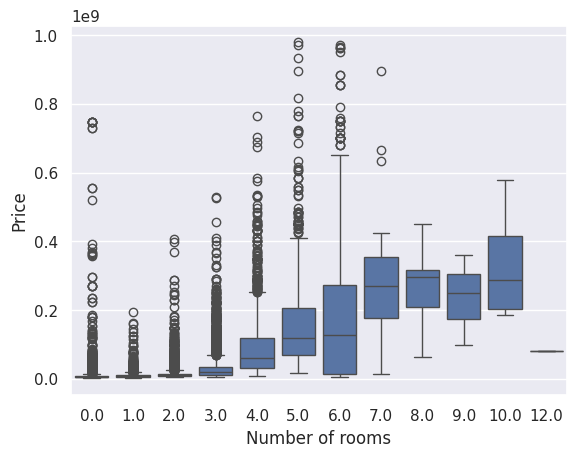

In [11]:
sns.boxplot(data=df, x="Number of rooms", y="Price")

In [12]:
%pip install category_encoders scikit-learn

DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /home/kitlix/.pyenv/versions/3.11.2/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
X = df.drop(["Price"], axis=1)
y = df["Price"]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
X_train

,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
1048,Secondary,Опалиха,7.0,Moscow region,1.0,41.8,23.3,10.1,5.0,6,Cosmetic
9168,Secondary,Фонвизинская,7.0,Moscow,3.0,63.0,45.0,6.5,12.0,12,Without renovation
6486,Secondary,Шипиловская,13.0,Moscow,2.0,46.0,30.0,7.0,4.0,12,Cosmetic
8962,Secondary,Технопарк,14.0,Moscow,3.0,70.3,47.0,7.8,2.0,15,Without renovation
10051,Secondary,Краснопресненская,10.0,Moscow,4.0,200.2,103.3,23.2,4.0,7,Cosmetic
...,...,...,...,...,...,...,...,...,...,...,...
11977,Secondary,Бибирево,10.0,Moscow,0.0,12.0,8.2,7.6,1.0,12,Cosmetic
21589,New building,Каширская,6.0,Moscow,4.0,108.6,57.0,15.6,3.0,10,European-style renovation
5396,Secondary,Чкаловская,0.0,Moscow,1.0,41.0,13.0,20.0,8.0,21,Designer
860,Secondary,Чистые пруды,5.0,Moscow,6.0,207.0,150.0,20.0,2.0,5,European-style renovation


In [7]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=["Apartment type", "Metro station", "Region", "Renovation"])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train

,Apartment type_1,Apartment type_2,Metro station_1,Metro station_2,Metro station_3,Metro station_4,Metro station_5,Metro station_6,Metro station_7,Metro station_8,...,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation_1,Renovation_2,Renovation_3,Renovation_4
1048,1,0,1,0,0,0,0,0,0,0,...,1.0,41.8,23.3,10.1,5.0,6,1,0,0,0
9168,1,0,0,1,0,0,0,0,0,0,...,3.0,63.0,45.0,6.5,12.0,12,0,1,0,0
6486,1,0,0,0,1,0,0,0,0,0,...,2.0,46.0,30.0,7.0,4.0,12,1,0,0,0
8962,1,0,0,0,0,1,0,0,0,0,...,3.0,70.3,47.0,7.8,2.0,15,0,1,0,0
10051,1,0,0,0,0,0,1,0,0,0,...,4.0,200.2,103.3,23.2,4.0,7,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11977,1,0,0,0,0,0,0,0,0,0,...,0.0,12.0,8.2,7.6,1.0,12,1,0,0,0
21589,0,1,0,0,0,0,0,0,0,0,...,4.0,108.6,57.0,15.6,3.0,10,0,0,1,0
5396,1,0,0,0,0,0,0,0,0,0,...,1.0,41.0,13.0,20.0,8.0,21,0,0,0,1
860,1,0,0,0,0,0,0,0,0,0,...,6.0,207.0,150.0,20.0,2.0,5,0,0,1,0


In [8]:
from sklearn.preprocessing import RobustScaler

cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train

,Apartment type_1,Apartment type_2,Metro station_1,Metro station_2,Metro station_3,Metro station_4,Metro station_5,Metro station_6,Metro station_7,Metro station_8,...,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation_1,Renovation_2,Renovation_3,Renovation_4
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.5,-0.287661,-0.203922,-0.084746,-0.333333,-1.111111,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.247287,0.647059,-0.694915,0.444444,-0.444444,-1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.181681,0.058824,-0.610169,-0.444444,-0.444444,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.5,0.431491,0.725490,-0.474576,-0.666667,-0.111111,-1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,3.709311,2.933333,2.135593,-0.444444,-1.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.039616,-0.796078,-0.508475,-0.777778,-0.444444,0.0,0.0,0.0,0.0
18125,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.397931,1.117647,0.847458,-0.555556,-0.666667,-1.0,0.0,1.0,0.0
18126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.5,-0.307848,-0.607843,1.593220,0.000000,0.555556,-1.0,0.0,0.0,1.0
18127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.880898,4.764706,1.593220,-0.666667,-1.222222,-1.0,0.0,1.0,0.0


In [9]:
%pip install xgboost catboost

DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /home/kitlix/.pyenv/versions/3.11.2/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(task_type="GPU", iterations=10000, devices="0:1")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred


Learning rate set to 0.014933
0:	learn: 73942504.8634013	total: 13.3ms	remaining: 2m 13s
1:	learn: 73205437.2918993	total: 25.2ms	remaining: 2m 5s
2:	learn: 72486583.9483087	total: 37.3ms	remaining: 2m 4s
3:	learn: 71762879.4443462	total: 52.2ms	remaining: 2m 10s
4:	learn: 71061741.2262223	total: 63.5ms	remaining: 2m 6s
5:	learn: 70366145.7183895	total: 77.7ms	remaining: 2m 9s
6:	learn: 69678574.2680936	total: 90ms	remaining: 2m 8s
7:	learn: 69007577.9351102	total: 103ms	remaining: 2m 8s
8:	learn: 68357506.2176918	total: 115ms	remaining: 2m 8s
9:	learn: 67740888.2549415	total: 127ms	remaining: 2m 7s
10:	learn: 67132762.0026841	total: 151ms	remaining: 2m 16s
11:	learn: 66524495.6826801	total: 166ms	remaining: 2m 17s
12:	learn: 65928347.3566204	total: 180ms	remaining: 2m 18s
13:	learn: 65333847.8969315	total: 194ms	remaining: 2m 18s
14:	learn: 64755943.6061103	total: 208ms	remaining: 2m 18s
15:	learn: 64183680.2227973	total: 222ms	remaining: 2m 18s
16:	learn: 63619524.6604314	total: 235m

array([1.71781179e+07, 4.28240507e+06, 1.29852901e+08, ...,
       2.67024442e+08, 6.39795255e+07, 4.11713091e+07])

In [21]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred)

0.25591970935840147